In [44]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())



In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
os.system('sshfs \
erd561@raijin.nci.org.au:/g/data/e14/erd561/CMIP5/bromeliad/ \
/Users/earl/Desktop/Demeter')

256

In [4]:
thefile = open('p04_models_list.txt', 'r')
plot_list = thefile.read().splitlines()
print(plot_list)


['ACCESS1-0', 'ACCESS1-3', 'CESM1-BGC', 'CESM1-CAM5', 'CMCC-CMS', 'CMCC-CM', 'CNRM-CM5', 'CSIRO-Mk3-6-0', 'CanESM2', 'FGOALS-s2', 'FIO-ESM', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M', 'HadGEM2-AO', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR', 'IPSL-CM5B-LR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MPI-ESM-MR', 'MRI-CGCM3', 'MRI-ESM1', 'NorESM1-ME', 'NorESM1-M']


In [5]:
script_name = nb_name[:-6]
print(script_name)
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'


hist_data_path = '/Users/earl/Desktop/Demeter/historical/'
hist_tos_path = hist_data_path + 'mon/ocean/r1i1p1/tos/latest/'
hist_tauuo_path = hist_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
hist_tos_list = sorted(os.listdir(hist_tos_path))
hist_tauuo_list = sorted(os.listdir(hist_tauuo_path))
#print(hist_models_list)


rcp85_data_path = '/Users/earl/Desktop/Demeter/rcp85/'
rcp85_tos_path = rcp85_data_path + 'mon/ocean/r1i1p1/tos/latest/'
rcp85_tauuo_path = rcp85_data_path + 'mon/ocean/r1i1p1/tauuo/latest/'
rcp85_tos_list = sorted(os.listdir(rcp85_tos_path))
rcp85_tauuo_list = sorted(os.listdir(rcp85_tauuo_path))
#print(rcp85_models_list)



p05_pick_positive_SAM


In [6]:
tos_hist = {}
tos_rcp85 = {}
tos_anom = {}
tos_lat = {}
tos_lon = {}

tauuo_hist = {}
tauuo_rcp85 = {}
tauuo_anom = {}
tauuo_lat = {}
tauuo_lon = {}

for model in plot_list:
    # These models are hard to deal with:
    # MIROC5 and inmcm4 have a crazy rotated grid
    # MPI-ESM-LR has a weird grid too
    if model in ['MIROC5', 'MPI-ESM-LR', 'inmcm4']:
        continue
    
    tos_hist_data = xr.open_dataset(hist_tos_path + model + '_1981-2000mean.nc')
    tos_rcp85_data = xr.open_dataset(rcp85_tos_path + model + '_2081-2100mean.nc')
    tos_hist[model] = tos_hist_data['tos'][0,:,:]
    tos_rcp85[model] = tos_rcp85_data['tos'][0,:,:]
    
    tauuo_hist_data = xr.open_dataset(hist_tauuo_path + model + '_1981-2000mean.nc')
    tauuo_rcp85_data = xr.open_dataset(rcp85_tauuo_path + model + '_2081-2100mean.nc')
    tauuo_hist[model] = tauuo_hist_data['tauuo'][0,:,:]
    tauuo_rcp85[model] = tauuo_rcp85_data['tauuo'][0,:,:]

    # MPI-ESM-LR has its lon cut-off over Australia
    if model in ['MPI-ESM-LR']:
        tos_hist_now = tos_hist[model]
        tos_hist[model] = tos_hist_now.roll(i=100)
        tos_rcp85_now = tos_rcp85[model]
        tos_rcp85[model] = tos_rcp85_now.roll(i=100)
        
        tauuo_hist_now = tauuo_hist[model]
        tauuo_hist[model] = tauuo_hist_now.roll(i=100)
        tauuo_rcp85_now = tauuo_rcp85[model]
        tauuo_rcp85[model] = tauuo_rcp85_now.roll(i=100)
    
    tos_anom[model] = tos_rcp85[model]-tos_hist[model]
    tauuo_anom[model] = tauuo_rcp85[model]-tauuo_hist[model]
    
    if len(tos_hist_data['lat'].shape) is 2:
        # MPI-ESM-LR and MPI-ESM-MR longitude index should be taken from the end
        if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
            tos_lat[model] = tos_hist_data['lat'][:,0]
            tos_lon[model] = tos_hist_data['lon'][-1,:]
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][-1,:]
            print(model + ' OK!')
            
        else:
            tos_lat[model] = tos_hist_data['lat'][:,0]
            tos_lon[model] = tos_hist_data['lon'][0,:]
            tauuo_lat[model] = tauuo_hist_data['lat'][:,0]
            tauuo_lon[model] = tauuo_hist_data['lon'][0,:]
            print(model + ' OK!')
        
    else:
        tos_lat[model] = tos_hist_data['lat'][:]
        tos_lon[model] = tos_hist_data['lon'][:]
        tauuo_lat[model] = tos_hist_data['lat'][:]
        tauuo_lon[model] = tos_hist_data['lon'][:]
        print(model + ' OK!')
    
    # The GFDL models run need this lon offset fix ...
    if model in ['GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M']:
        tos_lon[model][0:100] += 360
        tauuo_lon[model][0:100] += 360
    
    # MPI-ESM-LR lon needs to be offset...
    if model in ['MPI-ESM-LR']:
        tos_lon[model] -= 180
        tauuo_lon[model] -= 180
    
    # Also, MPI-ESM-LR and MPI-ESM-MR are flipped upside down...
    # Couldn't find a flip function in xarray...
    if model in ['MPI-ESM-LR', 'MPI-ESM-MR']:
        tos_anom_now = tos_anom[model]
        tos_anom[model] = np.flipud(tos_anom_now)
        tauuo_anom_now = tauuo_anom[model]
        tauuo_anom[model] = np.flipud(tauuo_anom_now)
        
        tos_lat_now = tos_lat[model]
        tos_lat[model] = np.flipud(tos_lat_now)
        tauuo_lat_now = tauuo_lat[model]
        tauuo_lat[model] = np.flipud(tauuo_lat_now)
        
    # HadGEM2-AO, MRI-CGCM3 and MRI-ESM1 need to have their wind stress land masked...
    if model in ['HadGEM2-AO', 'MRI-CGCM3', 'MRI-ESM1']:
        # anything that satisfies the condition is SAFE
        tauuo_anom[model] = tauuo_anom[model].where((tauuo_anom[model] != 0), np.nan)
    
    # MRI-CGCM3 and MRI-ESM1 need to have their SST land masked...
    if model in ['MRI-CGCM3', 'MRI-ESM1']:
        tos_anom[model] = tos_anom[model].where((tos_anom[model] != 0), np.nan)
        
print(len(plot_list))   
        

ACCESS1-0 OK!
ACCESS1-3 OK!
CESM1-BGC OK!
CESM1-CAM5 OK!
CMCC-CMS OK!
CMCC-CM OK!
CNRM-CM5 OK!
CSIRO-Mk3-6-0 OK!
CanESM2 OK!
FGOALS-s2 OK!
FIO-ESM OK!
GFDL-CM3 OK!
GFDL-ESM2G OK!
GFDL-ESM2M OK!
HadGEM2-AO OK!
IPSL-CM5A-LR OK!
IPSL-CM5A-MR OK!
IPSL-CM5B-LR OK!
MIROC-ESM-CHEM OK!
MIROC-ESM OK!
MPI-ESM-MR OK!
MRI-CGCM3 OK!
MRI-ESM1 OK!
NorESM1-ME OK!
NorESM1-M OK!
25


In [51]:
# SAM index:
lat_neg = -37
lat_pos = -55
lon_negW = 100
lon_negE = 140
SAM_neg = []
SAM_pos = []
SAM_index = []

# Warming pool area:
lat_warmN = -31
lat_warmS = -40
lon_warmW = 112
lon_warmE = 145
warm_pool = {}

wind_pool = {}

for idx, t in enumerate(plot_list):
    print(t)
    
    lat_neg_idx = find_nearest_index(tauuo_lat[t], lat_neg)
    lat_pos_idx = find_nearest_index(tauuo_lat[t], lat_pos)
    lon_negW_idx = find_nearest_index(tauuo_lon[t], lon_negW)
    lon_negE_idx = find_nearest_index(tauuo_lon[t], lon_negE)
    SAM_neg.append(np.nanmean(tauuo_anom[t][lat_neg_idx,lon_negW_idx:lon_negE_idx]))
    SAM_pos.append(np.nanmean(tauuo_anom[t][lat_pos_idx,lon_negW_idx:lon_negE_idx]))
    SAM_index.append(SAM_pos[idx] - SAM_neg[idx])
    print(SAM_index[idx])
    
    lat_warmN_idx = find_nearest_index(tos_lat[t], lat_warmN)
    lat_warmS_idx = find_nearest_index(tos_lat[t], lat_warmS)
    lon_warmW_idx = find_nearest_index(tos_lon[t], lon_warmW)
    lon_warmE_idx = find_nearest_index(tos_lon[t], lon_warmE)
    warm_pool[t] = np.nanmean(
        tos_anom[t][lat_warmS_idx:lat_warmN_idx,lon_warmW_idx:lon_warmE_idx])
    print(warm_pool[t])
    
    lat_warmN_idx = find_nearest_index(tauuo_lat[t], lat_warmN)
    lat_warmS_idx = find_nearest_index(tauuo_lat[t], lat_warmS)
    lon_warmW_idx = find_nearest_index(tauuo_lon[t], lon_warmW)
    lon_warmE_idx = find_nearest_index(tauuo_lon[t], lon_warmE)
    wind_pool[t] = np.nanmean(
        tauuo_anom[t][lat_warmS_idx:lat_warmN_idx,lon_warmW_idx:lon_warmE_idx])
    print(wind_pool[t])
    
SAM_index_sorted = np.flipud(np.argsort(SAM_index))
print(SAM_index_sorted)

SAM_index_sorted_cleaned = []
warm_pool_sorted_cleaned = {}
wind_pool_sorted_cleaned = {}

for dum, idx in enumerate(SAM_index_sorted):
    t = plot_list[idx]
    if SAM_index[idx] > 0:
        SAM_index_sorted_cleaned.append(t)
        warm_pool_sorted_cleaned[t] = warm_pool[t]
        wind_pool_sorted_cleaned[t] = wind_pool[t]

print(SAM_index_sorted_cleaned)

with open('p05_index_and_pools.pkl', 'wb') as f:
    pickle.dump([lat_warmN, lat_warmS, lon_warmW, lon_warmE,
                 SAM_index_sorted_cleaned, warm_pool_sorted_cleaned, wind_pool_sorted_cleaned], f)

ACCESS1-0
0.059208
2.24361
-0.0221295
ACCESS1-3
0.0486991
2.23345
-0.021696
CESM1-BGC
-0.0335788
2.98881
0.0146148
CESM1-CAM5
-0.0231299
2.94525
0.00873859
CMCC-CMS
0.105977
2.71166
-0.0230113
CMCC-CM
0.0843544
2.37359
-0.020465
CNRM-CM5
0.00994052
2.25763
-0.00214054
CSIRO-Mk3-6-0
0.0388651
2.35697
-0.0179092
CanESM2
0.0621949
2.81681
-0.0185196
FGOALS-s2
0.109975
4.11799
-0.0368457
FIO-ESM
0.0171456
2.97777
-0.00540938
GFDL-CM3
0.114703
2.54417
-0.025149
GFDL-ESM2G
0.0552917
1.48035
-0.00533156
GFDL-ESM2M
0.0644611
1.38759
-0.0073895
HadGEM2-AO
0.052284
2.33808
-0.0144922
IPSL-CM5A-LR
0.129669
3.58921
-0.0374109
IPSL-CM5A-MR
0.164163
3.8532
-0.0474085
IPSL-CM5B-LR
0.00695788
1.54533
0.00330908
MIROC-ESM-CHEM
0.061818
2.89595
-0.011435
MIROC-ESM
0.0748428
2.91359
-0.017523
MPI-ESM-MR
0.0716156
2.03233
-0.00933542
MRI-CGCM3
0.032647
1.73726
-0.00529761
MRI-ESM1
0.0360381
1.95457
-0.00968567
NorESM1-ME
0.0272705
2.25762
-0.00974572
NorESM1-M
0.0346938
2.12402
-0.00902952
[16 15 11  9  4

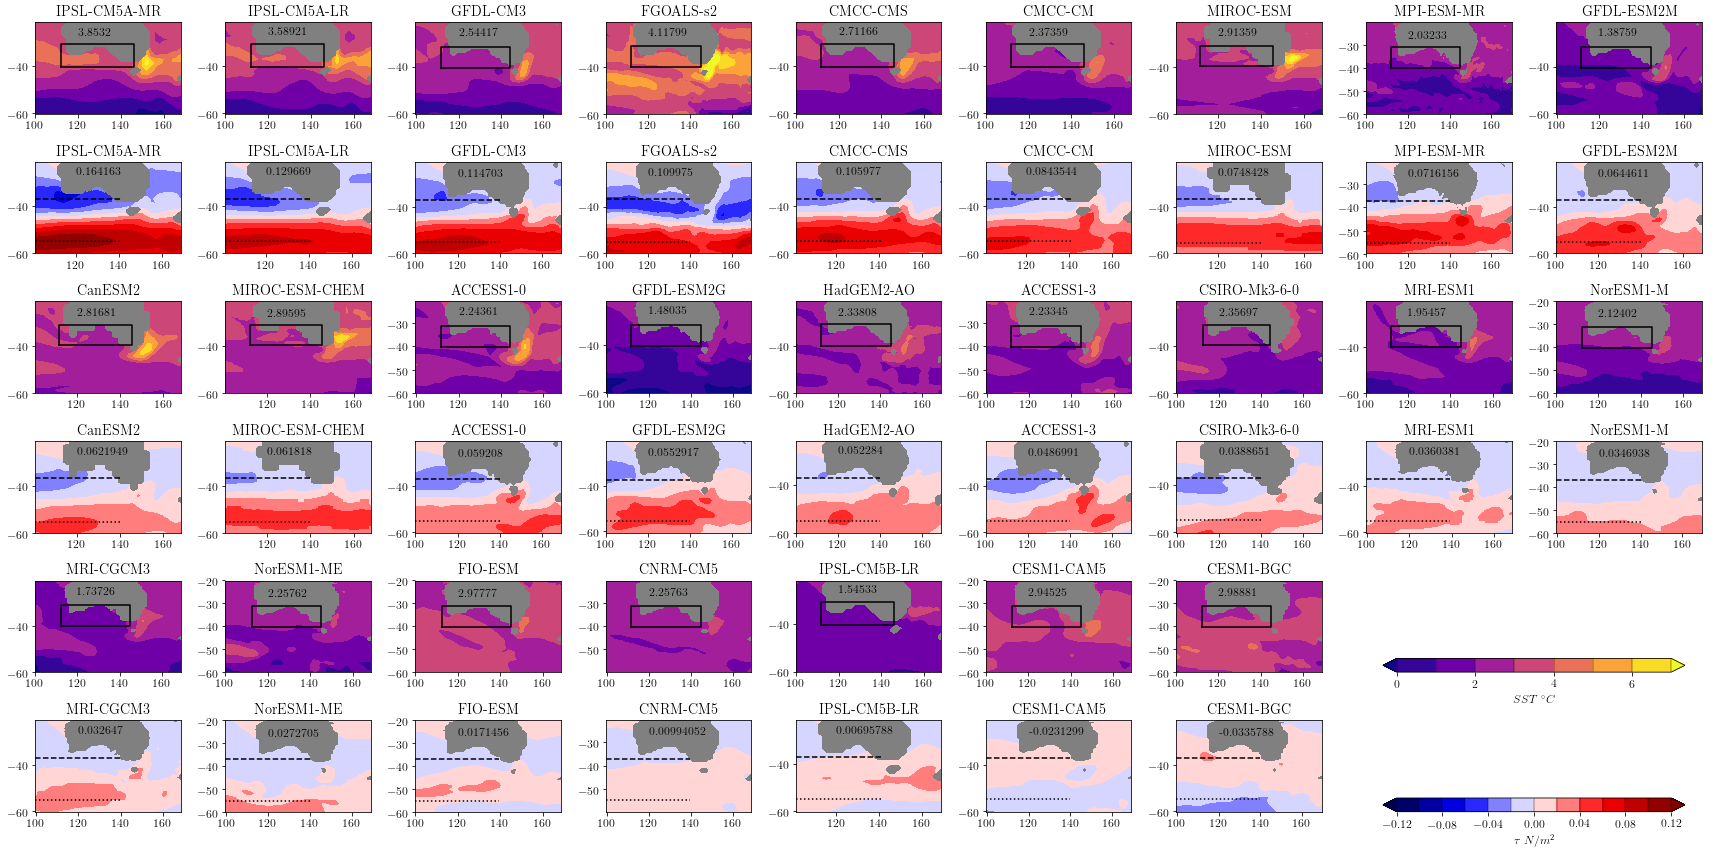

In [49]:
matplotlib.rcParams.update({'font.size': 12}) 
row = 6
col = 9
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(24, 12)

count = -1
p = 0
for dum, idx in enumerate(SAM_index_sorted):
    t = plot_list[idx]
    count += 1
    if count is col:
        count = 0
        p += 1
    
    ax = plt.subplot2grid((row, col), (p*2, count))
    cmap = plt.get_cmap('plasma')
    step = 1
    contf_lvls = np.arange(0,7+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N = -20
    lat_S = -60
    lon_W = 100
    lon_E = 170
    lat_N_idx = find_nearest_index(tos_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tos_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tos_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tos_lon[t], lon_E)
    contf = plt.contourf(
        tos_lon[t][lon_W_idx:lon_E_idx],
        tos_lat[t][lat_S_idx:lat_N_idx],
        tos_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_warmN_idx = find_nearest_index(tos_lat[t], lat_warmN)
    lat_warmS_idx = find_nearest_index(tos_lat[t], lat_warmS)
    lon_warmW_idx = find_nearest_index(tos_lon[t], lon_warmW)
    lon_warmE_idx = find_nearest_index(tos_lon[t], lon_warmE)
    plt.plot(
        [tos_lon[t][lon_warmW_idx],
         tos_lon[t][lon_warmE_idx],
         tos_lon[t][lon_warmE_idx],
         tos_lon[t][lon_warmW_idx],
         tos_lon[t][lon_warmW_idx]],
        [tos_lat[t][lat_warmS_idx],
         tos_lat[t][lat_warmS_idx],
         tos_lat[t][lat_warmN_idx],
         tos_lat[t][lat_warmN_idx],
         tos_lat[t][lat_warmS_idx]], '-k')
    ax.text(120, -27, str(warm_pool[t]))
    ax.set_title(t)
    if dum == len(SAM_index_sorted)-1:
        ax = plt.subplot2grid((row, col), (p*2, count+1), colspan=2)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$SST$ $^{\circ}C$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
        
    ax = plt.subplot2grid((row, col), (1+p*2, count))
    cmap = plt.get_cmap('seismic')
    step = 0.02
    contf_lvls = np.arange(-0.12,0.12+1e-08,step)              
    ax.set_facecolor('grey')
    lat_N_idx = find_nearest_index(tauuo_lat[t], lat_N)
    lat_S_idx = find_nearest_index(tauuo_lat[t], lat_S)
    lon_W_idx = find_nearest_index(tauuo_lon[t], lon_W)
    lon_E_idx = find_nearest_index(tauuo_lon[t], lon_E)
    contf = plt.contourf(
        tauuo_lon[t][lon_W_idx:lon_E_idx],
        tauuo_lat[t][lat_S_idx:lat_N_idx],
        tauuo_anom[t][lat_S_idx:lat_N_idx,lon_W_idx:lon_E_idx], contf_lvls, cmap=cmap, extend='both')
    lat_neg_idx = find_nearest_index(tauuo_lat[t], lat_neg)
    lat_pos_idx = find_nearest_index(tauuo_lat[t], lat_pos)
    lon_negW_idx = find_nearest_index(tauuo_lon[t], lon_negW)
    lon_negE_idx = find_nearest_index(tauuo_lon[t], lon_negE)
    plt.plot(
        [tauuo_lon[t][lon_negW_idx],tauuo_lon[t][lon_negE_idx]],
        [tauuo_lat[t][lat_neg_idx],tauuo_lat[t][lat_neg_idx]], '--k')
    plt.plot(
        [tauuo_lon[t][lon_negW_idx],tauuo_lon[t][lon_negE_idx]],
        [tauuo_lat[t][lat_pos_idx],tauuo_lat[t][lat_pos_idx]], ':k')
    ax.text(120, -27, str(SAM_index[idx]))
    ax.set_title(t)
    if dum == len(SAM_index_sorted)-1:
        ax = plt.subplot2grid((row, col), (1+p*2, count+1), colspan=2)
        cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
        cbar.set_label(r'$\tau$ $N/m^{2}$') 
        cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
        plt.axis('off')
    
plt.tight_layout()

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)
    
    